Enable slideshow view
![enable_slideshow](../data/enable_slideshow.png)

All cells will get extra settings:
![slide_type](../data/slide_type.png)


Do not forget to set `Markdown` type for cells with explanations and `Code` type for cells with code:
![cell_type](../data/cell_type.png)

Press the button with barchart to start and debug your interactive presentation:
![run_slideshow](../data/run_slideshow.png)

- **NB!** You can find more tips and tricks (hotkeys for example) at [RISE documentation](https://rise.readthedocs.io/en/stable/usage.html?highlight=slide%20type#creating-a-slideshow)

- **NB!** You can find basics of markdown (citations, images, etc.) at [Jupyter documentation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)

For formulas it's most convenient to use [Latex support in Jupyter](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations)
> Fo example, inside text block $x = y * й$ or as a separate LateX equation block $$complexity = O(log{}n)$$

You can run the code inside the slides (`Ctrl+Enter` by default).

Jupyter has many [built-in magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) and [extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions).

Especially convenient are exectution time measure [`%timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) and extension for memory profiling [`%memit`](https://pypi.org/project/memory-profiler/)

In [1]:
%load_ext memory_profiler

from random import randint

def benchmark_sort():
    unsorted_list = [randint(0, 100_000) for _ in range(1_000_000)]
    unsorted_list.sort()

%memit benchmark_sort()
%timeit benchmark_sort()

peak memory: 93.45 MiB, increment: 42.22 MiB
1.14 s ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


You also can add visualizations and interactive animations with widgets.
To make `matplotlib` graphs interactive use `%matplotlib notebook` instead of `%matplotlib inline`.

In [8]:
# need to of these magics, because of jupyter graphical bug
%matplotlib notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


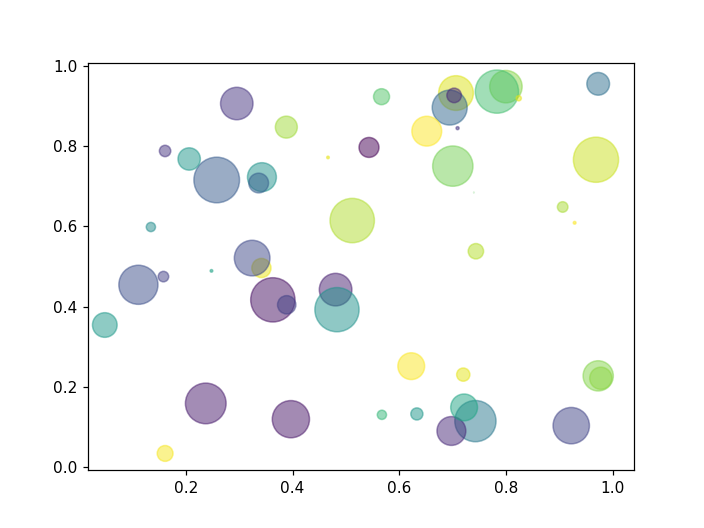

In [9]:
# Source: https://matplotlib.org/3.3.1/gallery/shapes_and_collections/scatter.html
np.random.seed(19680801)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [4]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Source with some modifications: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/
from matplotlib import animation, rc
from IPython.display import HTML

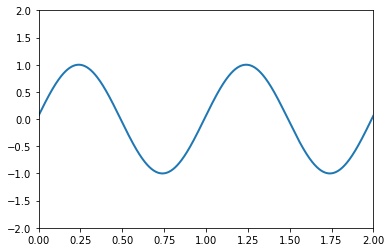

In [6]:
Writer = animation.writers['pillow']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20,
                               blit=True)

HTML(anim.to_html5_video())